# General isotherm info

Before we start the characterisation, let's have a cursory look at the isotherms. First, make sure the data is imported by running the previous notebook.

In [1]:
# import isotherms
%run import.ipynb

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


We know that some of the isotherms are measured with nitrogen at 77 kelvin, but
don't know what the samples are. If we evaluate an isotherm, its key details are
automatically displayed.

In [2]:
isotherms_n2_77k

[
    <PointIsotherm 5b36aabf643c8557893f1a82aeedffaa>: 'nitrogen' on 'MCM-41' at 77.355 K,
    <PointIsotherm e0590c7a3dae0ea88d7328c2c1a31fed>: 'nitrogen' on 'NaY' at 77.355 K,
    <PointIsotherm 25abc19b921164e130f13e0126763853>: 'nitrogen' on 'SiO2' at 77.355 K,
    <PointIsotherm b72b8b4b525dc901d2977ad577637462>: 'nitrogen' on 'Takeda 5A' at 77.355 K,
    <PointIsotherm 5133355996d3f32458515fd1cf492813>: 'nitrogen' on 'UiO-66(Zr)' at 77.355 K
]

So we have a mesoporous templated silica, a zeolite, some amorphous silica, a
microporous carbon and a common MOF.

What about the isotherms which we'll use for isosteric calculations? Let's see
what is the sample and what temperatures they are recorded at. We can use the
standard `print` method on an isotherm for some detailed info.

In [3]:
print(isotherms_isosteric[0])
print([isotherm.temperature for isotherm in isotherms_isosteric])

Material: TEST
Adsorbate: n-butane
Temperature: 298.15K
Units: 
	Uptake in: mmol/g
	Pressure in: bar
Other properties: 
	iso_type: isotherm
	material_batch: TB

[298.15, 323.15, 348.15]


Let's look at the isotherms that were measured in a combination with
microcalorimetry. Besides the loading and pressure points, these isotherms also
have a differential enthalpy of adsorption measured for each point. We can use
the `isotherm.print_info` function, which also outputs a graph of the isotherm besides
its properties.

Material: Takeda 5A
Adsorbate: carbon dioxide
Temperature: 303.0K
Units: 
	Uptake in: mmol/g
	Pressure in: bar
Other properties: 
	iso_type: Calorimetrie
	lab: MADIREL
	instrument: CV
	material_batch: Test
	activation_temperature: 150.0
	user: ADW



(
    <AxesSubplot:xlabel='Pressure [$bar$]', ylabel='Loading [$mmol\\/g^{-1}$]'>,
    <AxesSubplot:ylabel='$\\Delta_{ads}h$ $(-kJ\\/mol^{-1})$'>
)

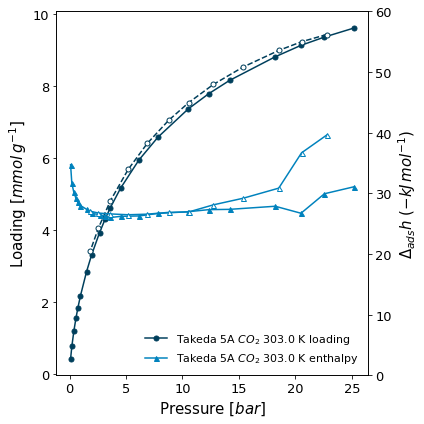

In [4]:
# The second axis range limits are given to the print function
isotherms_calorimetry[1].print_info(y2_range=(0,60))

For the isotherms which are to be used for IAST calculations, we'd like to plot
them on the same graph, with the name of the adsorbate in the legend. For this
we can use the more general `pygaps.graphing.plot_iso` function.

<AxesSubplot:xlabel='Pressure [$bar$]', ylabel='Loading [$mmol\\/g^{-1}$]'>

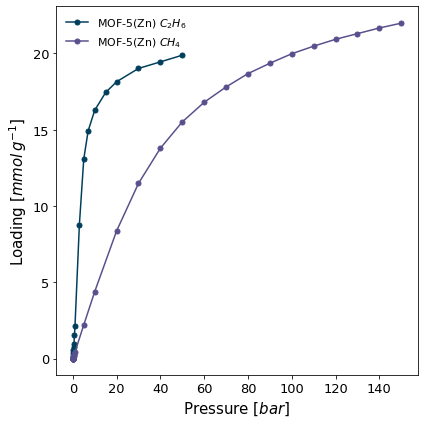

In [5]:
# import the characterisation module
import pygaps.graphing as pgg

pgg.plot_iso(
    isotherms_iast,                         # the isotherms
    branch='ads',                           # only the adsorption branch
    lgd_keys=['material','adsorbate'],      # the isotherm properties making up the legend
)